# Mod√®le lin√©aire

Consid√©rons la cas classique d'une fonction affine :

$$y=ax+b$$

Ici, $a$ et $b$ sont des r√©els. Ces deux nombres d√©finissent enti√®rement la courbe et permet donc d'obtenir une relation **affine** entre $x$ et $y$. En statistique, cette relation est √† la base des mod√®les dit **lin√©aires**, o√π une variable r√©ponse se d√©finit comme une somme de variables explicatives o√π chacune de ces derni√®res sont multipli√©s par un coefficient.


## Mod√®le lin√©aire simple

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png)

Dans le mod√®le lin√©aire simple (une seule variable explicative), on suppose que la variable r√©ponse suit le mod√®le suivant :

$$y_i=\beta_0 + \beta_1 x_i + \varepsilon_i$$

On remarque la ressemblance avec la fonction affine pr√©sent√©e ci-dessus. La diff√©rence r√©side dans l'existence du terme al√©atoire (appel√© bruit) $\varepsilon_i$. Afin de consid√©rer le mod√®le, il est n√©cessaire de se placer sous les hypoth√®ses suivantes

$$(\mathcal{H}) : \left\{\begin{matrix}
\mathbb{E}[\varepsilon_i]=0\\ 
\text{Cov}(\varepsilon_i, \varepsilon_j)=\delta_{ij} \sigma^2
\end{matrix}\right.$$
Les diff√©rents √©l√©ments qui interviennent sont :

- $\beta_0$ : l'ordonn√©e √† l'origine (nomm√©e *intercept*)
- $\beta_1$ : le coefficient directeur
- $x_i$ : l'observation $i$
- $y_i$ : le $i$-√®me prix
- $\varepsilon_i$ : le bruit al√©atoire li√©e √† la $i$-√®me observation

La solution peut se calculer facilement via les formules ferm√©es suivantes :

$$\hat{\beta}_1=\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \qquad \hat{\beta}_0 = \hat{y} - \hat{\beta}_1 \bar{x}$$

##¬†Mod√®le lin√©aire multiple

Dans le cas multiple (pour $p$ variables explicatives), pour la $i$-√®me observation, le mod√®le s'√©crit :

$$y_i= \beta_0 + \sum_{j=1}^p \beta_j x_{ij} + \varepsilon_i$$

Ainsi, une observation $x_i$ n'est plus une valeur, mais un **vecteur** $(x_{i1}, \dots, x_{ip})$. Il est plus commode de regrouper ces prix $y_i$ et ces vecteurs d'observations $x_i$ dans des matrices :

$$Y=X \beta + \varepsilon$$

Sous les hypoth√®ses √©quivalentes du mod√®le simple en plus grand dimension

$$(\mathcal{H}) : \left\{\begin{matrix}
\text{rank}(X)=p\\ 
\mathbb{E}[\varepsilon]=0 \text{ et }\text{Var}(\varepsilon)=\sigma^2 I_p
\end{matrix}\right.$$

Les diff√©rents √©l√©ments qui interviennent sont :

- $\beta$ : le vecteur directeur
- $X$ : la matrice des observations
- $Y$ : le vecteur de prix
- $\varepsilon$ : le vecteur de bruit

Avec $X=( \mathbf{1}, X_1, \dots, X_n)$, $Y=(y_1, \dots, y_n)^\top$ et $\varepsilon=(\varepsilon_1, \dots, \varepsilon_n)^\top$. La solution des MCO (Moindres Carr√©s Ordinaires) est alors :

$$\hat{\beta}= (X^\top X)^{-1} X^\top Y$$

Vous pouvez d'ailleurs faire la d√©monstration de votre cot√© ! Pour plus d'information math√©matiques, le portail de wikip√©dia qui est tr√®s bien fait : [lien ici](https://fr.wikipedia.org/wiki/Portail:Probabilit%C3%A9s_et_statistiques)

# Impl√©menter une r√©gression lin√©aire 


In [1]:
#importer vos librairies 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#charger les donn√©es 
#price_availability.csv
#listings_final.csv
#v√©rifier si tous les individus ont bien un prix 
df_pa = pd.read_csv('../data/price_availability.csv', sep=';'); df_pa.head()

listing_id         day                       created  available  \
0     9810829  2018-12-08  2018-09-27 06:14:10.000+0000       True   
1     9810829  2018-12-08  2018-09-26 19:34:02.000+0000       True   
2    20897010  2018-12-09  2018-09-27 10:38:57.000+0000       True   
3    20897010  2018-12-09  2018-09-27 06:10:27.000+0000       True   
4    20897010  2018-12-09  2018-09-26 19:30:25.000+0000       True   

  local_currency  local_price  min_nights  
0            EUR          160           1  
1            EUR          160           1  
2            EUR          172           2  
3            EUR          172           2  
4            EUR          172           2

In [9]:

df_lf = pd.read_csv('listings_final.csv', sep=';'); df_lf.head()

Unnamed: 0  listing_id                                      name  \
0           0    28581061                           La maison Clery   
1           1      661961       studio PARIS PLACE EDITH PIAF 75020   
2           2     1261705  chambre priv√©e √† louer @ paris oberkampf   
3           3     1318834            Appartement au coeur du Marais   
4           4     1677091                       Lovely & Quiet flat   

           type   city                  neighborhood   latitude  longitude  \
0  private_room  Paris             2e arrondissement  48.869292   2.348335   
1   entire_home  Paris                           NaN  48.867284   2.403255   
2  private_room  Paris                           NaN  48.867894   2.375897   
3   entire_home  Paris                    R√©publique  48.870370   2.358510   
4   entire_home  Paris  Buttes-Chaumont - Belleville  48.874149   2.373700   

   person_capacity  beds  bedrooms  bathrooms  is_rebookable  is_new_listing  \
0                1     1         1        2.0          False            True   
1                2     1         1        1.0          False           False   
2                1     1         1        1.0          False           False   
3                3     2         2        1.0          False           False   
4                2     1         1        1.0          False           False   

   is_fully_refundable  is_host_highly_rated  is_business_travel_ready  \
0                 True                 False                     False   
1                 True                  True                     False   
2                 True                  True                     False   
3                 True                 False                     False   
4                 True                  True                     False   

   pricing_weekly_factor  pricing_monthly_factor  
0                   1.00                    1.00  
1                   0.88                    0.69  
2                   1.00                    1.00  
3                   0.82                    0.48  
4                   0.95                    0.90

In [37]:
filter = df_lf[{'listing_id'}]
new_df_pa = df_pa[df_pa['listing_id'].isin(filter['listing_id'])]

In [42]:
price_average = new_df_pa[{'listing_id', 'local_price'}].groupby('listing_id').mean()
price_average.round(2)

local_price
listing_id             
56093            170.00
57207             49.95
114543           107.37
149534           169.00
164255            75.88
...                 ...
28684174         725.18
28709644         475.00
28751412         117.00
28774896         156.40
28792796          49.18

[999 rows x 1 columns]

## Donn√©es d'entr√©e

L'objectif ici est de charger les donn√©es pour cr√©er les matrices $X$ et $Y$ du mod√®le lin√©aire. **Attention**, il n'est pas n√©cessaire de rajouter le vecteur colonne $\mathbf{1}$ en premi√®re colonne, car *scikit-learn* le fait automatiquement !

In [44]:
#d√©finir 2 variables de travail
#X := les features √† utiliser 
#Y := la target (prix)
X = price_average.loc[:, ['local_price']]

In [45]:
X.shape

(999, 1)

In [ ]:
#construire l'ensemble de donn√©e prix 
#
#    INDICE 
# 
# r√©cup√©rer les prix des ID dans le dataset de prix 
# üöß il y a plusieurs prix dans le dataset üöß



En *Machine Learning*, on a l'habitude de couper l'ensemble de donn√©es en deux sous-ensembles :

- Un ensemble d'entra√Ænement (*train set*), sur lequel le mod√®le va √™tre calibr√©.
- Un ensemble de test (*test set*), qui ne sera pas utilis√© pendant le calibrage mais permettra de v√©rifier l'aptitude du mod√®le √† g√©n√©raliser sur de nouvelles observations inconnues.

En g√©n√©ral, on d√©coupe l'ensemble de donn√©es (*split*) en prenant $\alpha \%$ de l'ensemble pour entra√Ænement et $1-\alpha \%$ comme test. Dans la plus part des cas, on consid√®re que $\alpha=10,20 ou 30\%$.

In [ ]:
#utiliser la m√©thode split de sklearn en splitant avec un alpha=30 et un random state=42 
#zafficher la shape de vos donn√©es 


((699, 4), (699,), (300, 4), (300,))

## Entra√Ænement

Pour information, *scikit-learn* utilise le solveur OLS (Ordinary Least Squares) de *numpy*.

In [ ]:
#cr√©er l'objet de r√©gression et entrainer le sur notre ensemble d'entra√Ænement


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

On affiche le vecteur des coefficients pour interpr√©ter rapidement le mod√®le.

In [ ]:
#afficher les coefficients
#que remarquez vous ? 


Coefficients beta_j : 
 [2.47834609e-06 3.23451085e+01 1.43887639e+01 7.75318453e+01]
Coefficients INTERCEPT beta_0 : 
 -79.79953133672862


## Validation du mod√®le

### Le coefficient de d√©termination $R^2$

Par la suite, nous ferons l'hypoth√®se de gaussianit√© sur les bruits. Dans l'id√©e, nous aimerions obtenir une valeur num√©rique qui nous indique √† quel point la r√©gression lin√©aire a un sens sur nos donn√©es. Pour cela, introduisons les notations suivantes :

- $SCT=\|Y-\hat{y} \mathbf{1}\|^2$ est la somme des carr√©s totaux
- $SCE=\|\hat{Y}-\hat{y} \mathbf{1}\|^2$ est la somme des carr√©s expliqu√©s
- $SCR=\|\hat{\varepsilon}\|^2$ est la somme des carr√©s r√©siduels

L'id√©e est de d√©composer la somme des carr√©s totaux comme la somme des carr√©s que le mod√®le explique, en plus de la somme des carr√©s qui sont li√©s aux r√©sidus (et donc que le mod√®le ne peut pas expliquer). On voit donc ici l'int√©r√™t de calculer un coefficient √† partir du $SCE$. Puisque l'on a la relation suivante :

$$SCT=SCE+SCR \text{ alors } 1=\frac{SCE}{SCT}+\frac{SCR}{SCT}$$

Plus les r√©sidus sont petits (et donc la r√©gression est "bonne"), plus $SCR$ devient petit et donc $SCE$ devient grand. Le sch√©ma inverse s'op√®re de la m√™me fa√ßon. Dans le meilleur des cas, on obtient $SCR=0$ et donc $SCE=SCT$ d'o√π le premier membre vaut $1$. Dans le cas contraite, $SCE=0$ et automatiquement, le premier membre est nul. C'est ainsi que l'on d√©finit le coefficient de d√©termination $R^2$ comme 
$$R^2=\frac{SCE}{SCT}=1-\frac{SCR}{SCT}$$
Ainsi, $R^2 \in [0,1]$. Plus $R^2$ est proche de $1$, plus la r√©gression lin√©aire a du sens. Au contraire, si $R^2$ est proche de $0$, le mod√®le lin√©aire poss√®de un faible pouvoir explicatif.

In [ ]:
#faire une prediction sur X


taille du vecteur Y_pred : 999 


In [ ]:
#afficher l'erreur des moindres carr√©es sur l'ensemble d'entrainement ainsi que le R2


Mean squared error: 21320.77
R2 : 0.37


## Bonus : Analyse de l'homosc√©dasticit√©

L'analyse de l'homosc√©dasticit√© est primordiale : c'est en particulier elle qui nous permet de v√©rifier, √† partir des r√©sidus, si les bruits v√©rifient bien l'hypoth√®se $(\mathcal{H})$. On calcule donc les **r√©sidus studentis√©s**.

$$t_i^*=\frac{\hat{\varepsilon}_i}{\hat{\sigma}_{(i)} \sqrt{1-h_{ii}}}$$
Avec $h_{ii}=\{X(X^\top X)^{-1} X^\top\}_{ii}=H_{ii}$ la matrice de projection sur l'hyperplan des variables. Plus pr√©cis√©ment, $H$ est la matrice qui projette $Y$ sur l'espace engendr√© par les variables, soit $\hat{Y}=HY$. De m√™me, on consid√®re $\hat{\sigma}_{(i)}$ l'estimateur de la variance du bruit en supprimant l'observation $i$ (par une m√©thode de validation crois√©e Leave-One-Out que nous ne d√©taillerons pas ici).

Dans ce cas, on peut montrer que les r√©sidus studentis√©s suivent une loi de Student √† $n-p-1$ degr√©s de libert√©.

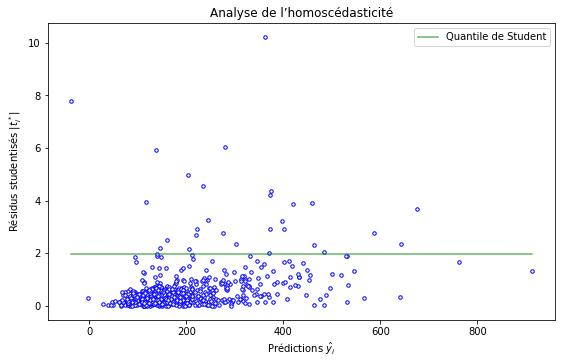

In [ ]:
#analyser le code ci-dessous 
import scipy
Y_pred = regr.predict(X_train)
n = X_train.shape[0]
p = 4
residuals = np.abs(y_train - Y_pred)
H = np.matmul(X_train, np.linalg.solve(np.dot(X_train.T, X_train), X_train.T))
std_hat = np.dot(residuals, residuals) / (n - p)
standart_residuals = np.asarray([residuals[i] / np.sqrt(std_hat * (1 - H[i, i])) for i in range(len(residuals))])
student_residuals = np.asarray([ standart_residuals[i] * np.sqrt((n - p - 1) / (n - p - standart_residuals[i]**2)) for i in range(n) ])
cook = np.asarray([ H[i, i] * student_residuals[i] / (X_train.shape[1] * (1 - H[i, i])) for i in range(n) ])

plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.scatter(Y_pred, student_residuals, s=12, c="white", edgecolors="blue")
plt.plot([min(Y_pred), max(Y_pred)], [ scipy.stats.t.ppf(q=0.975, df=n-p-1), scipy.stats.t.ppf(q=0.975, df=n-p-1)], color="green", alpha=0.6, label="Quantile de Student")
plt.title("Analyse de l‚Äôhomosc√©dasticit√©")
plt.xlabel("Pr√©dictions $\hat{y}_i$")
plt.ylabel("R√©sidus studentis√©s $|t_i^*|$")
plt.legend()